## Introduction to the Interstellar Medium
### Jonathan Williams

### Figures 9.5 and 9.6: two layer infall profiles 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
%matplotlib inline

In [8]:
# blackbody profile
# could also just call astropy but this is shorter...
def Bnu(nu,T):
    return(2*c.h*nu**3 / c.c**2 * (np.exp(c.h*nu/(c.k_B*T)) - 1)**-1)

In [9]:
# the two-layer model
def Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, tau_f):
    nu = nu0 * (1 - v / 2.9978e5)
    tau_nub = tau_b / np.exp(v**2/(2*sigma**2))
    tau_nuf = tau_f / np.exp((v-v_in)**2/(2*sigma**2))
    Inu = Bnu(nu, T_b) * (1 - np.exp(-tau_nub)) * np.exp(-tau_nuf) + Bnu(nu, T_f) * (1 - np.exp(-tau_nuf))
    return(Inu)

In [10]:
def plot_profile1():
    Tk = 10 * u.K
    a = np.sqrt(c.k_B * Tk / (2*c.m_p))  # thermal
    sigma = 0.3                          # turbulent
    vmax = 1.6
    dv = 0.025
    v = np.arange(-vmax, vmax+dv, dv)

    T_f = 5 * u.K
    T_b = 20 * u.K
    tau_f = 1
    tau_b = 2
    v_in = 0.1

    # aperture
    r = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(r/2.355)**2*2.35e-11   # steradians

    #nu0 = 345.796e9 * u.Hz                  # CO 3-2
    #nu0 = 115.271e9 * u.Hz                  # CO 1-0
    nu0 = 97.981e9 * u.Hz                   # CS 2-1

    #Fnu = Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26              # Jy
    #TB = c.c**2 * Inu / (2*c.k_B*nu0**2) # K

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)

    #ax.set_xlim(-2.3, 2.3)
    ax.set_xlim(-1.75, 1.75)
    ax.set_ylim(-1.0, 12)
    ax.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)

    tau_b = 2
    Fnu = Inu(nu0, v, 0.1, sigma, T_b, tau_b, T_f, 0.1) * Omega * 1e26
    ax.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.2, label='0.1')
    Fnu = Inu(nu0, v, 0.1, sigma, T_b, tau_b, T_f, 0.5) * Omega * 1e26
    ax.plot(v, Fnu, color='black', lw=2.3, ls='-', alpha=0.4, label='0.5')
    Fnu = Inu(nu0, v, 0.1, sigma, T_b, tau_b, T_f, 2) * Omega * 1e26
    ax.plot(v, Fnu, color='black', lw=2.6, ls='-', alpha=1, label='2.0')
    ax.legend(loc=1, title=r'$\tau_{\rm f0}$')
    ax.text(0.05, 0.87, r'$v_{\rm in} = 0.1\,{\rm km/s}$', fontsize=12, transform=ax.transAxes)

    fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
    plt.savefig('infall1.pdf')

In [31]:
def plot_profile2():
    Tk = 10 * u.K
    a = np.sqrt(c.k_B * Tk / (2*c.m_p))  # thermal
    sigma = 0.3                          # turbulent
    vmax = 1.6
    dv = 0.025
    v = np.arange(-vmax, vmax+dv, dv)

    T_f = 5 * u.K
    T_b = 20 * u.K
    tau_f = 1.5
    tau_b = 2
    v_in = 0.1

    # aperture
    r = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(r/2.355)**2*2.35e-11   # steradians

    #nu0 = 345.796e9 * u.Hz              # CO 3-2
    #nu0 = 115.271e9 * u.Hz              # CO 1-0
    nu0 = 97.981e9 * u.Hz               # CS 2-1
    
    fig = plt.figure(figsize=(8,5))
 
    ax1 = fig.add_subplot(121)
    ax1.set_xlim(-1.75, 1.75)
    ax1.set_ylim(-0.5, 8.0)
    ax1.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax1.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)

    Fnu = Inu(nu0, v, 0.0, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=1, label='0')
    Fnu = Inu(nu0, v, 0.1, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.4, label='0.1')
    Fnu = Inu(nu0, v, 0.2, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.2, label='0.2')
    ax1.legend(loc=1, title=r'$v_{\rm in}$')
    ax1.text(0.06, 0.92, 'Collapsing', fontsize=13, transform=ax1.transAxes)
    #ax1.text(0.06, 0.87, r'$\tau_{\rm b} = 2$', fontsize=11, transform=ax1.transAxes)
    ax1.text(0.06, 0.87, r'$\tau_{\rm f0} = 1$', fontsize=11, transform=ax1.transAxes)
 
    ax2 = fig.add_subplot(122)
    ax2.set_xlim(-1.75, 1.75)
    ax2.set_ylim(-0.5, 8.0)
    ax2.set_yticklabels([])
    plt.setp(ax2.get_yticklabels(), visible=True)
    ax2.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)

    Fnu = Inu(nu0, v, 0.0, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax2.plot(v, Fnu, color='black', lw=2, ls='-', alpha=1, label='0')
    Fnu = Inu(nu0, v, -0.1, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax2.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.4, label='-0.1')
    Fnu = Inu(nu0, v, -0.2, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e26
    ax2.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.2, label='-0.2')
    ax2.legend(loc=1, title=r'$v_{\rm in}$')
    ax2.text(0.06, 0.92, 'Expanding', fontsize=13, transform=ax2.transAxes)
    #ax2.text(0.06, 0.87, r'$\tau_{\rm b} = 2$', fontsize=11, transform=ax2.transAxes)
    ax2.text(0.06, 0.87, r'$\tau_{\rm f0} = 1$', fontsize=11, transform=ax2.transAxes)

    fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
    plt.savefig('infall2.pdf')

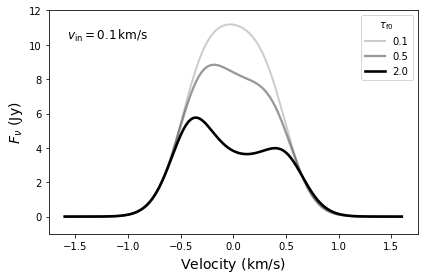

In [22]:
# Figure 9.5
plot_profile1()

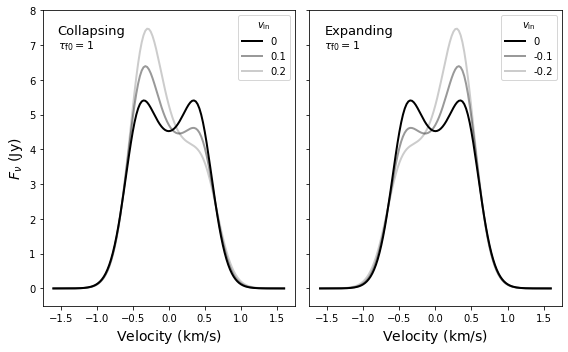

In [32]:
# Figure 9.6
plot_profile2()